# E-Commerce: Product Range Analysis

## by Michael Eibner

## Project Explanation

The E-Commerce dataset is from a store in the USA. It contains:
* `InvoiceNo`: The invoice number of the purchase
* `StockCode`: The stock code of the product
* `Description`: The name and Description of the product
* `Quantity`: The amount of products sold per purchase
* `InvoiceDate`: The date of the purchase
* `UnitPrice`: The price of the product
* `CustomerID`: The ID of the single customer. If the customer is not registrated, its value is `nan`

By analysing the dataset, we will find out how we can decrease costs, increase revenue and profit.


## The goal of the Project

Analyze, identify, categorize, and sort the product range of the store. Find connections and patterns of buying habits of customers. Optimize the product range and make warehousing more efficient to increase the profit.

# Part 1 Data Preprocessing

## Import Libraries

In [527]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import HTML

## Set all Visualisations in the Center
[Source Link](https://moonbooks.org/Articles/How-to-center-a-matplotlib-figure-in-a-Jupyter-notebook-/)

In [528]:
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

## Load the Dataset

In [529]:
# create the dataframe df
df = pd.read_csv('ecommerce_dataset_us.csv', sep='\t')

## Data Overview

### First Overview

* Using functions .info(), .head(), and .describe()

In [530]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 28.9+ MB


In [531]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,11/29/2018 08:26,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,11/29/2018 08:26,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,11/29/2018 08:26,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,11/29/2018 08:26,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,11/29/2018 08:26,3.39,17850.0


In [532]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### Overview over the Columns

In [533]:
for i in df.columns:
    print(f'{i} contains {df[i].nunique()} unique values')

InvoiceNo contains 25900 unique values
StockCode contains 4070 unique values
Description contains 4223 unique values
Quantity contains 722 unique values
InvoiceDate contains 23260 unique values
UnitPrice contains 1630 unique values
CustomerID contains 4372 unique values


In [534]:
print(f'The first InvoiceDate is: {df.InvoiceDate.min()}\nThe last InvoiceDate is: {df.InvoiceDate.max()}')

The first InvoiceDate is: 01/02/2019 10:00
The last InvoiceDate is: 12/21/2018 17:41


We have to set the InvoiceDate column to a datetime format to see the first and the last purchase

In [535]:
# description contains some words that are not uppercase
df_lower = df[pd.notnull(df['Description'])]
df_lower = df_lower[df_lower['Description'].str.islower()]
print('Words not in Upper (sample of 10):')
df_lower['Description'].sample(5)

Words not in Upper (sample of 10):


422811                 damaged
314575                  amazon
50849     mouldy, thrown away.
428659                   check
362365                 damages
Name: Description, dtype: object

In [536]:
print('Count of lowercase words:')
len(df_lower)

Count of lowercase words:


493

In [537]:
# some quantity are negative
df_quan_neg = df[df['Quantity']<0]
print('Count of negative Quantity:')
len(df_quan_neg)

Count of negative Quantity:


10624

In [538]:
# UnitPrice is 0
print('Priceless Producs:')
df[df['UnitPrice']==0].sample(5)

Priceless Producs:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
7205,537013,35965,NaN,-25,12/01/2018 15:40,0.0,NaN
13959,537436,84270,NaN,7,12/04/2018 17:00,0.0,NaN
124012,546933,22623,BOX OF VINTAGE JIGSAW BLOCKS,1,03/16/2019 11:02,0.0,NaN
150623,549497,21527,NaN,3,04/06/2019 15:06,0.0,NaN
193566,553539,22677,FRENCH BLUE METAL DOOR SIGN 2,2,05/15/2019 15:27,0.0,NaN


In [539]:
print('Count of priceless Products:')
len(df[df['UnitPrice']==0])

Count of priceless Products:


2515

In [540]:
# some UnitPrice are negative
df_unit_neg = df[df['UnitPrice']<0]
print('Count of negative UnitPrice:')
len(df_unit_neg)

Count of negative UnitPrice:


2

In [541]:
# some InvoiceNo contains uppercase letters, 
df_inv_alpha = df[df['InvoiceNo'].str.contains(r'[A-Z]')]
print('Count of Rows with alphabetic letters in InvoiceNo:')
len(df_inv_alpha)

Count of Rows with alphabetic letters in InvoiceNo:


9291

In [542]:
print('Rows with alphabetic letters in InvoiceNo:')
df_inv_alpha.sample(5)

Rows with alphabetic letters in InvoiceNo:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
1974,C536548,22242,5 HOOK HANGER MAGIC TOADSTOOL,-5,11/29/2018 14:33,1.65,12472.0
132296,C547661,21874,GIN AND TONIC MUG,-1,03/22/2019 13:09,1.25,13736.0
39756,C539667,21284,RETROSPOT CANDLE SMALL,-24,12/19/2018 10:47,0.42,13148.0
156234,C550127,37449,CERAMIC CAKE STAND + HANGING CAKES,-1,04/12/2019 13:12,9.95,15212.0
516370,C579886,22578,WOODEN STAR CHRISTMAS SCANDINAVIAN,-1,11/28/2019 17:39,0.29,15676.0


In [543]:
# are there other letters than C in InvoiceNo?
df_inv_not_C = df_inv_alpha[~df_inv_alpha['InvoiceNo'].str.contains('C')]
print('Not C:')
df_inv_not_C.head()

Not C:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
299982,A563185,B,Adjust bad debt,1,08/10/2019 14:50,11062.06,NaN
299983,A563186,B,Adjust bad debt,1,08/10/2019 14:51,-11062.06,NaN
299984,A563187,B,Adjust bad debt,1,08/10/2019 14:52,-11062.06,NaN


In [544]:
# some StockCode contains uppercase letters, 
df_stock_alpha = df[df['StockCode'].str.contains(r'[A-Z]')]
print('Count of Rows with alphabetic letters in StockCode:')
len(df_stock_alpha)

Count of Rows with alphabetic letters in StockCode:


52896

In [545]:
print('Sample of 10 of Rows with alphabetic letters in StockCode:')
df_stock_alpha.sample(5)

Sample of 10 of Rows with alphabetic letters in StockCode:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
371246,569216,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1,09/30/2019 12:41,2.95,15555.0
64400,541604,85184C,S/4 VALENTINE DECOUPAGE HEART BOX,2,01/17/2019 17:23,2.95,14572.0
84771,543447,46775D,SUNSET COLOUR CHUNKY KNITTED THROW,2,02/06/2019 12:01,16.95,16265.0
210613,555284,85230E,STRAWBRY SCENTED VOTIVE CANDLE,144,05/31/2019 09:37,0.21,14298.0
221069,556237,85086A,CANDY SPOT HEART DECORATION,1,06/07/2019 15:34,0.83,NaN


In [546]:
# check on duplicates
print('Count of duplicates:')
df.duplicated().value_counts()

Count of duplicates:


False    536641
True       5268
dtype: int64

In [547]:
# analyse one random item
rand_item = df[df['Description'] == df.sample().iloc[0]['Description']]
print('Analysis of a random Item:')
rand_item.head()

Analysis of a random Item:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
118,536381,21166,COOK WITH WINE METAL SIGN,1,11/29/2018 09:41,1.95,15311.0
1301,536532,21166,COOK WITH WINE METAL SIGN,12,11/29/2018 13:24,1.95,12433.0
1911,536544,21166,COOK WITH WINE METAL SIGN,2,11/29/2018 14:32,4.21,NaN
2415,536590,21166,COOK WITH WINE METAL SIGN,12,11/29/2018 16:52,1.95,13065.0
4717,536798,21166,COOK WITH WINE METAL SIGN,12,11/30/2018 15:55,1.95,17838.0


In [548]:
# StockCode that contains no numbers
fees = df[~df['StockCode'].str.contains(r'[0-9]')]
print(f'Count of Rows with no Numbers in StockCode is: {len(fees)}\n')
fees.StockCode.value_counts()

Count of Rows with no Numbers in StockCode is: 2796



POST            1256
DOT              710
M                571
D                 77
S                 63
BANK CHARGES      37
AMAZONFEE         34
CRUK              16
DCGSSGIRL         13
DCGSSBOY          11
PADS               4
B                  3
m                  1
Name: StockCode, dtype: int64

## Check for missing values

In [549]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
dtype: int64

## Explanation of the columns

* **InvoiceNo:**

**Kind of ID number of an Invoice / a single Purchase**

* **InvoiceDate:**

**The Purchase Date**


* **CustomerID:**

**The ID of the single Customer - some Customers aren't registered, their ID is 'nan'**

* **StockCode:**

**The Code of a single Product**

* **Description:**

**The Desription and the Name of the Product**

* **UnitPrice:**

**The Price of the Product**

* **Quantity:**

**The Number of Products purchased on a single Invoice**

## Assessing Data before Cleaning
**What I found out:**

* The Dataset contains 541909 Rows and 7 Columns
* Quantity and UnitPrice are the only numeric Columns
* InvoiceNo & StockCode contains numbers and letters
* Unique Values:
    * InvoiceNo contains 25900 unique values
    * StockCode contains 4070 unique values
    * Description contains 4223 unique values
    * Quantity contains 722 unique values
    * InvoiceDate contains 23260 unique values
    * UnitPrice contains 1630 unique values
    * CustomerID contains 4373 unique values
* The Dataset contains Data from end of November 2018 till mid of December 2019
* Description contains not only Products
* There're Rows with:
    * negative Quantity
    * no Price
    * negative Price
    * Duplicates
* Description contains missing values
* CustomerID contains missing values but they are 'nan'
* Cancellations should be deleted

## Clean Data

In [550]:
# make a copy of the dataset
df_clean = df.copy()

# change column types to work with them later
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['CustomerID'] = df['CustomerID'].astype('str')

# drop unecessary rows
'''
the next code drops the cancelled purchases and their orders. This code is from Dorothy Kunth, fellow Masterschool student, she posted it on Slack.
'''
df_pairs = df_clean.groupby([df_clean.CustomerID, df_clean.StockCode, df_clean.Quantity.abs()]).filter(lambda x: (len(x.Quantity.abs()) % 2 == 0) and (x.Quantity.sum() == 0))
df_clean = df_clean.drop(df_pairs.index)

# drop missing values in Description
df_clean = df_clean.dropna(thresh=len(df_clean.columns))
# drop duplicates
df_clean = df.drop_duplicates()
# drop fees
df_clean = df_clean[df_clean['StockCode'].str.contains(r'[0-9]')]
# drop negative prices and priceless rows
df_clean = df_clean[df_clean['UnitPrice']>0]
# drop negative Quantity
df_clean = df_clean[df_clean['Quantity']>0]
# drop Rows with no Product Name
df_clean = df_clean[df_clean['Description'].str.contains(r'[A-Z]')]
# to compare the dataset for one whole year, we delete the rows before 07. december 2018
df_clean = df_clean[df_clean['InvoiceDate']>='2018-12-07']

# find out how many rows are deleted
diff = len(df) - len(df_clean)
diff_pct = (diff/len(df))*100
print(f'{diff} Rows were deleted, {round(diff_pct, 2)}% of the Dataset')

38092 Rows were deleted, 7.03% of the Dataset


# Part 2 First Ananyses

## Calculate the Revenue

In [551]:
# caluculating the revenue by multipliying the Quantity with the UnitPrice
df_clean['Revenue'] = df_clean['Quantity']*df_clean['UnitPrice']

## Finding first KPIs

### Revenue per Customer

In [552]:
df_cust = df_clean[df_clean['CustomerID']!='nan']
rev_per_cust = df_cust[['Revenue', 'CustomerID']].groupby('CustomerID').sum()
rev_per_cust.describe()

,Revenue
count,4271.000000
mean,1983.859150
std,8723.497699
min,3.750000
25%,302.150000
50%,656.680000
75%,1614.610000
max,279138.020000


### Revenue per Purchase

In [553]:
rev_per_purch = df_clean[['Revenue', 'InvoiceNo']].groupby('InvoiceNo').sum()
rev_per_purch.describe()

,Revenue
count,19052.000000
mean,519.446711
std,1782.907135
min,0.380000
25%,152.445000
50%,302.855000
75%,485.182500
max,168469.600000


### Purchases per Day

In [554]:
# use only the dates
df_clean['Date'] = df_clean['InvoiceDate'].dt.date
# find the purchases per day
purch_per_day = df_clean[['InvoiceNo', 'Date']].groupby('Date').count().sort_values('Date')
purch_per_day.describe()

,InvoiceNo
count,298.000000
mean,1690.661074
std,795.913940
min,220.000000
25%,1168.750000
50%,1496.500000
75%,1971.250000
max,5243.000000


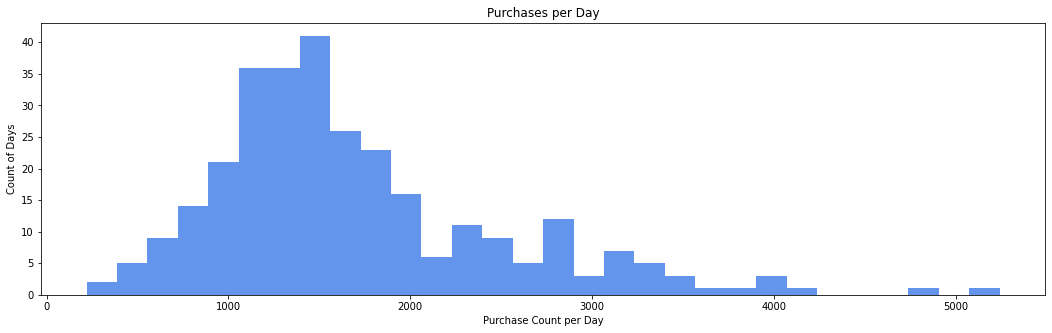

In [555]:
# plot the purchases per day in a histogram to see the distribution
plt.hist(x=purch_per_day['InvoiceNo'], bins=30, color='cornflowerblue')
plt.title('Purchases per Day')
plt.xlabel('Purchase Count per Day')
plt.ylabel('Count of Days')
plt.show();

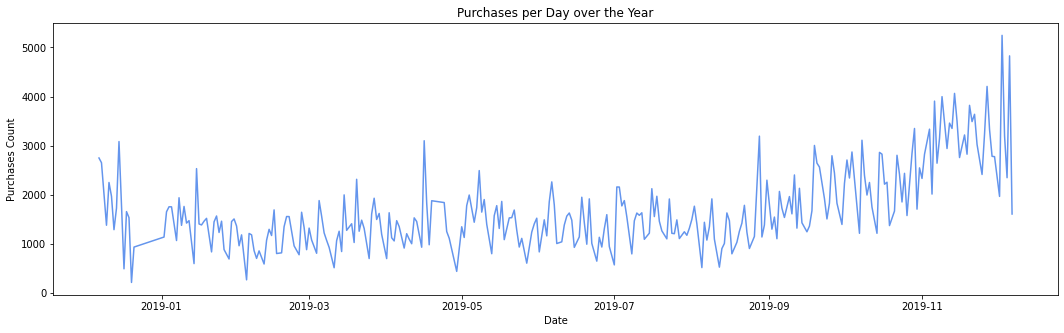

In [556]:
# plot the purchases per day in a lineplot
g = sns.lineplot(data=purch_per_day, x='Date', y='InvoiceNo', color='cornflowerblue')
g.set_xlabel('Date')
g.set_ylabel('Purchases Count')
g.set_title('Purchases per Day over the Year')
g;

### Revenue per Customer per Purchase

In [557]:
rev_per_cust_purch = df_cust[['Revenue', 'CustomerID', 'InvoiceNo']].groupby(['CustomerID', 'InvoiceNo']).sum()
rev_per_cust_purch.describe()

,Revenue
count,17728.000000
mean,477.948016
std,1702.745772
min,0.380000
25%,157.767500
50%,302.400000
75%,466.687500
max,168469.600000


### Purchases per Month

In [558]:
# create a column for months
df_clean['Month'] = df_clean['InvoiceDate'].dt.month
# find the purchases per day
purch_per_month = df_clean[['InvoiceNo', 'Month']].groupby('Month').count()
purch_per_month.describe()

,InvoiceNo
count,12.00000
mean,41984.75000
std,15796.31834
min,26091.00000
25%,34100.25000
50%,37510.00000
75%,42480.75000
max,83051.00000


## Patterns

### In Quantity

In [559]:
# overview of the distribution of quantity
df_clean['Quantity'].describe()

count    503817.000000
mean         10.720859
std         159.293476
min           1.000000
25%           1.000000
50%           4.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

In [560]:
# quantity per purchase
quan_per_purch = df_clean[['Quantity', 'InvoiceNo']].groupby('InvoiceNo').sum()
quan_per_purch.describe()

,Quantity
count,19052.000000
mean,283.505721
std,973.656266
min,1.000000
25%,72.000000
50%,155.000000
75%,301.000000
max,80995.000000


### In Prices

In [561]:
# pick the max price of every single product
df_max = df_clean[['Description', 'UnitPrice']].groupby('Description').max()
df_max['MaxPrice'] = df_max['UnitPrice']
df_max = df_max.drop(columns='UnitPrice', axis=1)
# create the PriceLevel column by joining to the df
df_clean = df_clean.join(df_max, on='Description')
df_clean['PriceLevel'] = round((df_clean['UnitPrice']/df_clean['MaxPrice'])*100).astype('int')
df_clean = df_clean.drop(columns='MaxPrice', axis=1)

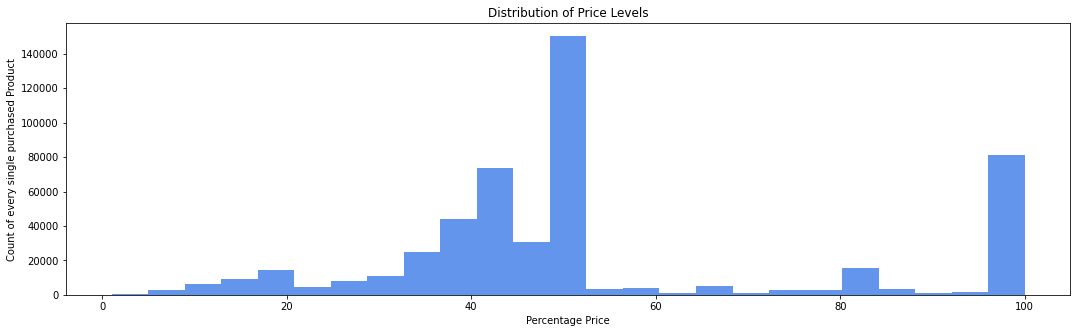

In [562]:
# plot the price level distribution
plt.hist(x=df_clean['PriceLevel'], bins=25, color='cornflowerblue')
plt.title('Distribution of Price Levels')
plt.xlabel('Percentage Price')
plt.ylabel('Count of every single purchased Product')
plt.show();

## Conclusion

* The average revenue per customer is: 1983.86
* The average revenue per purchase is: 519.45
* The average number of purchases per day is: 1690
* The average customer spends 477.95 per purchase
* Most of the days have between 1000 and 2000 purchases
* Before Christmas the purchases per day increases
* The average quantity of a single product is: 10
* The average quantity per purchase is: 283
* Most of the Products were 50% or less of the maximum price

# Part 3 Product Analysis

## Catgegorize Products by ABC Analysis

**ABC-Analysis is a distribution of products in 3 categories:**
* A: The best selling producs, they make 70% of the revenue
* B: These products make a acceptable amount of revenue. In this case 25%. These should continue to be sold
* C: These products should be taken out of the assortment. They make the least 5% of the revenue and cost more to store it in the shop

In [563]:
#create a function to distribute the accumulated values in A, B, or C
def distribute_in_abc(row, column):
    if row[column] <70:
        return 'A'
    elif row[column] <95:
        return 'B'
    else:
        return 'C'

# create a function for 
def abc_analysis(df, column):
    '''
    distribute all values of the column in A, B, or C by Revenue
    '''
    # create columns for market share and accumulation
    share = df[[column, 'Revenue']].groupby(column, as_index=False).sum()
    share['MarketShare'] = round((share['Revenue']/share['Revenue'].sum())*100, 2)
    share = share.sort_values('MarketShare', ascending=False)
    share['Accumulated'] = share['MarketShare'].cumsum()
    share[f'ABC {column}'] = share.apply(lambda row: distribute_in_abc(row, 'Accumulated'), axis=1)
    # drop the unnecessary columns
    share = share.drop(columns=['MarketShare', 'Accumulated', 'Revenue'])
    share[column] = share[column].astype(str)
    # merge the dataframes
    df = df.merge(share, on=column, copy=False)
    return df

In [564]:
# distribute the products with the function
df_clean = abc_analysis(df_clean, 'Description')

In [565]:
# get a qick overview about the ABC analysis
df_clean.groupby('ABC Description').sum()

,Quantity,UnitPrice,Revenue,Month,PriceLevel
ABC Description,,,,,
A,3051637,994947.74,6916653.94,1831032,12566079
B,1770798,496859.68,2381850.04,1373148,10209117
C,578916,156267.46,597994.76,489943,4239056


In [566]:
df_clean.groupby('ABC Description').mean()

,Quantity,UnitPrice,Revenue,Month,PriceLevel
ABC Description,,,,,
A,12.211726,3.981479,27.678351,7.327235,50.285637
B,9.614967,2.697817,12.932818,7.455832,55.432815
C,8.299633,2.240329,8.573156,7.024071,60.773254


## Analyze Correlations

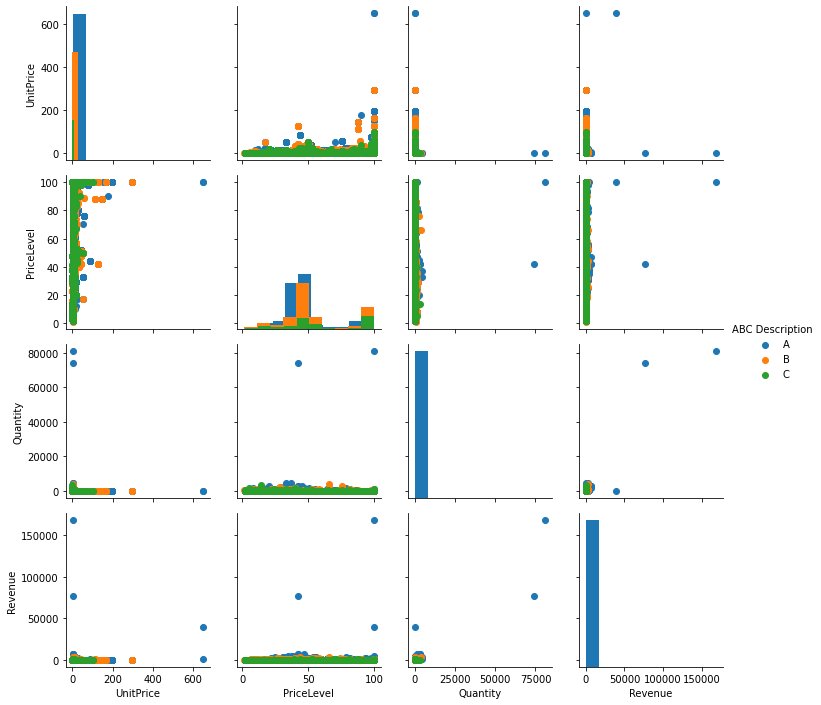

In [567]:
# finding correlations with a scatter matrix
matrix = sns.PairGrid(data = df_clean, vars=['UnitPrice', 'PriceLevel', 'Quantity', 'Revenue'], hue='ABC Description')
matrix.map_offdiag(plt.scatter)
matrix.map_diag(plt.hist)
matrix.add_legend();

### What we can see:

* There's a few Outliers. They confuse the Visualization
* 3 Products with an incredible high Price. Only one of them ensures a high Revenue
* 1 Product with high sales figures and Revenue and the Price is 50% off
* 2 Products with high sales figures and Revenue that are almost 100% off
* Most of the Products are 50% from the max Price
* The cheaper Products create the most Revenue
* Almost no Product creates high Revenue by full Price

## Analysing the Outliers

**How can we influence revenue by harnessing the influence of outliers?**

In [568]:
# products with the hightest price
high_price = df_clean[df_clean['UnitPrice']>220]
high_price = high_price.groupby(['Description', 'ABC Description', 'CustomerID', 'PriceLevel']).sum()
high_price

Quantity  \
Description                    ABC Description CustomerID PriceLevel             
PICNIC BASKET WICKER 60 PIECES A               15098.0    100               61   
VINTAGE BLUE KITCHEN CABINET   B               13452.0    100                2   
                                               14973.0    100                1   
VINTAGE RED KITCHEN CABINET    A               13015.0    100                1   
                                               14842.0    100                1   
                                               16607.0    100                1   
                                               17406.0    100                1   

                                                                      UnitPrice  \
Description                    ABC Description CustomerID PriceLevel              
PICNIC BASKET WICKER 60 PIECES A               15098.0    100            1299.0   
VINTAGE BLUE KITCHEN CABINET   B               13452.0    100             590.0   
                                               14973.0    100             295.0   
VINTAGE RED KITCHEN CABINET    A               13015.0    100             295.0   
                                               14842.0    100             295.0   
                                               16607.0    100             295.0   
                                               17406.0    100             295.0   

                                                                      Revenue  \
Description                    ABC Description CustomerID PriceLevel            
PICNIC BASKET WICKER 60 PIECES A               15098.0    100         39619.5   
VINTAGE BLUE KITCHEN CABINET   B               13452.0    100           590.0   
                                               14973.0    100           295.0   
VINTAGE RED KITCHEN CABINET    A               13015.0    100           295.0   
                                               14842.0    100           295.0   
                                               16607.0    100           295.0   
                                               17406.0    100           295.0   

                                                                      Month  
Description                    ABC Description CustomerID PriceLevel         
PICNIC BASKET WICKER 60 PIECES A               15098.0    100            12  
VINTAGE BLUE KITCHEN CABINET   B               13452.0    100             6  
                                               14973.0    100             4  
VINTAGE RED KITCHEN CABINET    A               13015.0    100             5  
                                               14842.0    100             2  
                                               16607.0    100            12  
                                               17406.0    100             1

In [569]:
# products with the hightest quantity
high_quant = df_clean[df_clean['Quantity']> 20000]
high_quant = high_quant.groupby(['Description', 'ABC Description', 'CustomerID', 'PriceLevel']).sum()
high_quant

,,,,Quantity,UnitPrice,Revenue,Month
Description,ABC Description,CustomerID,PriceLevel,,,,
MEDIUM CERAMIC TOP STORAGE JAR,A,12346.0,42,74215,1.04,77183.6,1
"PAPER CRAFT , LITTLE BIRDIE",A,16446.0,100,80995,2.08,168469.6,12


In [570]:
# products with the hightest revenue
high_rev = df_clean[df_clean['Revenue']> 20000]
high_rev = high_rev.groupby(['Description', 'ABC Description', 'CustomerID', 'PriceLevel']).sum()
high_rev

,,,,Quantity,UnitPrice,Revenue,Month
Description,ABC Description,CustomerID,PriceLevel,,,,
MEDIUM CERAMIC TOP STORAGE JAR,A,12346.0,42,74215,1.04,77183.6,1
"PAPER CRAFT , LITTLE BIRDIE",A,16446.0,100,80995,2.08,168469.6,12
PICNIC BASKET WICKER 60 PIECES,A,15098.0,100,60,649.50,38970.0,6


### Conclusion

* There're 2 high priced A products and one B product.
* Only one customer bought all the 61 picnic baskets.
* The two best-selling products were also only bought by a single customer
* The products that generated the highest Revenue also have the highest quantity
* All Outliers were boughts maybe by a special order and it seems that they will not be offered regularly

### Delete the Outliers to get a better view over the Correlations

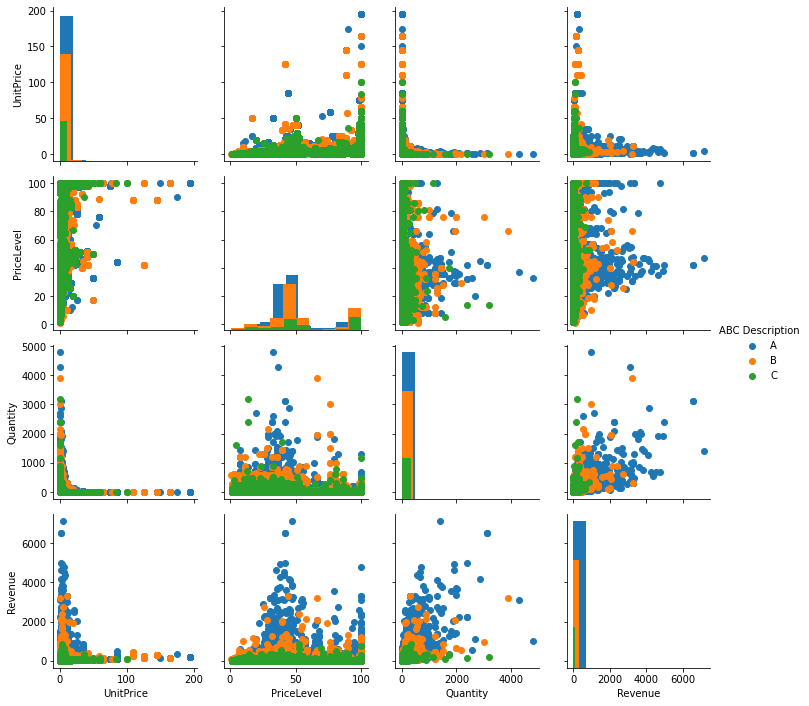

In [571]:
# gethering all the outliers and drop it from the dataset
df_clean = df_clean[(df_clean['Revenue']<20000) & (df_clean['Quantity']<20000) & (df_clean['UnitPrice']<220)]
# plot the correlations
matrix = sns.PairGrid(data = df_clean, vars=['UnitPrice', 'PriceLevel', 'Quantity', 'Revenue'], hue='ABC Description')
matrix.map_offdiag(plt.scatter)
matrix.map_diag(plt.hist)
matrix.add_legend();

### What we can see

* High prices products are not the top seller (exceptions prove the rule, we deleted the outliers)
* most of the products are on 50% of the maximum price
* We should focus more on the A-products, because they make great Quantity and Revenue
* We should sort out C-products

# Part 4 Goal-oriented Analyses

## Categorize Customers by RFM Analysis

[Source Link](https://www.youtube.com/watch?v=VE0m2FLoJCk)

### Definition of RFM Analysis

* **R:** Recency, customer activity. Time since the last order
* **F:** Frequency, frequency of the customer. Number of orders
* **M:** Monetary, total value of the transaktions of the customer

**The RFM-Analysis ranks a customer in these three categories. The lower the score the better the result. The *best* customer would have the lowest score in every category**

In [572]:
# set the latest date
latest_date = df_clean['InvoiceDate'].max()

# get rid of the 'nan' values in CustomerID
df_cust = df_clean.copy()
df_cust = df_cust = df_clean[df_clean['CustomerID']!='nan']

# create rfm modelling scores
rfm_scores = df_clean.groupby('CustomerID').agg({'InvoiceDate': lambda x: (latest_date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'Revenue': lambda x: x.sum()})

# convert InvoiceDate to an integer
rfm_scores['InvoiceDate'] = rfm_scores['InvoiceDate'].astype(int)

# rename columns
rfm_scores.rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'Revenue': 'Monetary'}, inplace=True)

In [573]:
# split into four quantiles
quantiles = rfm_scores.quantile(q=[0.25, 0.5, 0.75])
quantiles = quantiles.to_dict()

In [574]:
# define functions to create R, F and M segments
def r_scoring(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.5]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4
    

def f_and_m_scoring(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.5]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [575]:
# calculate r, f and m segment value volumns in the dataset
rfm_scores['R'] = rfm_scores['Recency'].apply(r_scoring, args=('Recency', quantiles, ))
rfm_scores['F'] = rfm_scores['Frequency'].apply(f_and_m_scoring, args=('Frequency', quantiles, ))
rfm_scores['M'] = rfm_scores['Monetary'].apply(f_and_m_scoring, args=('Monetary', quantiles, ))

# calculate the rfm group
rfm_scores['RFMGroup'] = rfm_scores['R'].map(str) + rfm_scores['F'].map(str) + rfm_scores['M'].map(str)

# calculate the rfm score
rfm_scores['RFMScore'] = rfm_scores[['R', 'F', 'M']].sum(axis=1)

In [576]:
# assing loyality level to each customer
loyality_level = ['Platinum', 'Gold', 'Silver', 'Bronze']
score_cuts = pd.qcut(rfm_scores['RFMScore'], q=4, labels=loyality_level)
rfm_scores['LoyalityLevel'] = score_cuts.values
rfm_scores = rfm_scores.reset_index()

In [577]:
rfm_scores.sample(5)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,LoyalityLevel
2190,15372.0,136,27,2007.40,4,3,1,431,8,Gold
2614,15958.0,73,7,104.35,3,4,4,344,11,Bronze
3363,17006.0,4,44,781.78,1,2,2,122,5,Platinum
3131,16684.0,3,277,66653.56,1,1,1,111,3,Platinum
511,13027.0,113,26,6912.00,3,3,1,331,7,Gold


In [578]:
# join the loyality level to the dataset
df_clean = df_clean.merge(rfm_scores[['CustomerID', 'LoyalityLevel']], on='CustomerID')

### KPIs

Find out:
* Revenue per loyality level
* Average price level
* Count of customers
* Amount of products ordered
* Count of single products ordered
* Sum of purchases

In [579]:
# find out the KPIs
per_level = df_clean.groupby('LoyalityLevel').agg({'Revenue': 'sum', 'PriceLevel': 'mean', 'CustomerID': 'nunique', 'Quantity': 'sum', 'Description':'nunique', 'InvoiceNo':'nunique'}).reset_index()
per_level

,LoyalityLevel,Revenue,PriceLevel,CustomerID,Quantity,Description,InvoiceNo
0,Platinum,7720118.86,55.804931,1254,4074814,3917,12951
1,Gold,1306260.04,44.789498,1306,808287,3398,3680
2,Silver,435249.80,45.483617,952,273430,2889,1508
3,Bronze,147532.34,46.904080,758,89542,2249,907


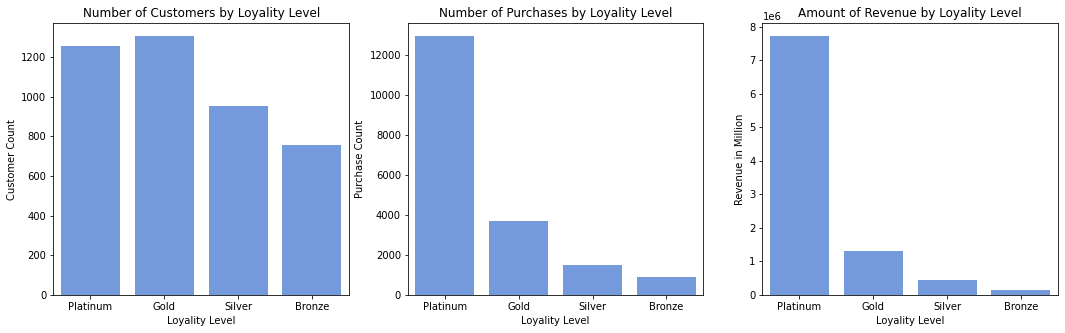

In [580]:
# set the size of the visualizations
plt.rcParams['figure.figsize'] = 18, 5
# plot the count of customers, count of purchases, and amount of revenue per loyality level
plt.subplot(1, 3, 1)
g = sns.barplot(data=per_level, x='LoyalityLevel', y='CustomerID', color='cornflowerblue')
g.set_title('Number of Customers by Loyality Level')
g.set_ylabel('Customer Count')
g.set_xlabel('Loyality Level')
g;
plt.subplot(1, 3, 2)
g = sns.barplot(data=per_level, x='LoyalityLevel', y='InvoiceNo', color='cornflowerblue')
g.set_title('Number of Purchases by Loyality Level')
g.set_ylabel('Purchase Count')
g.set_xlabel('Loyality Level')
g;
plt.subplot(1, 3, 3)
g = sns.barplot(data=per_level, x='LoyalityLevel', y='Revenue', color='cornflowerblue')
g.set_title('Amount of Revenue by Loyality Level')
g.set_ylabel('Revenue in Million')
g.set_xlabel('Loyality Level')
g;

### Conclusion

* Platinum customers create the highest amount of purchases and revenue
* There are more gold customers than platinum customers
* There're less than 800 bronze customers
* There're 50% more platinum and gold users than bronze users
* Platinum customers buy products at a higher price level

## Pareto Principle

### Definition 
![](https://upload.wikimedia.org/wikipedia/commons/e/eb/Pareto_principle.png)

Vilfredo Pareto described once the 80-20 phenomenon. 80% of outcomes are due to 20% of causes. As example: 20% of people own 80% of all money.

### Products that make 80% of Revenue

In [581]:
# defining a function
def pareto_calculation(column):
    pareto = df_clean[['Revenue', column]].groupby(column).sum()
    pareto = pareto.sort_values('Revenue', ascending=False)
    pareto['PercRev'] = round((pareto['Revenue'].cumsum()/pareto['Revenue'].sum())*100, 2)
    pareto_80_perc_rev = pareto[pareto['PercRev']<=80]
    return round(len(pareto_80_perc_rev)/len(pareto)*100, 2)

In [582]:
# find out how many products make 80% of revenue
products_80_20 = pareto_calculation('Description')
print(f'{products_80_20} of products make 80% of revenue')

# find out how many customers make 80% of revenue
cust_80_20 = pareto_calculation('CustomerID')
print(f'{cust_80_20} of customers make 80% of revenue')

21.81 of products make 80% of revenue
23.02 of customers make 80% of revenue


### Conclusion

* In this case, we proof the pareto principle
* 21.81% of the products create 80% of revenue
* 23.02% of the customers ceate 80% of revenue

# Part 5 Statistical Hypotheses

## Does it make sense to lean the product range?

### Calculation

In [583]:
# split the dataset in c products and a&b products
abc_prod = df_clean.groupby('ABC Description').agg({'Revenue':'sum',
                                                   'Quantity':'sum',
                                                   'CustomerID':'nunique',
                                                   'PriceLevel':'mean',
                                                   'Description':'nunique'}).reset_index()
abc_prod

,ABC Description,Revenue,Quantity,CustomerID,PriceLevel,Description
0,A,6630201.24,2896362,4189,50.284278,556
1,B,2380965.04,1770795,4050,55.432089,1285
2,C,597994.76,578916,3389,60.773254,2130


In [584]:
# find out how much percent of revenue
c_rev_percent = round((abc_prod.iloc[2]['Revenue']/abc_prod['Revenue'].sum())*100, 2)
print(f'C products make {c_rev_percent}% of the revenue')

# find out how many capacities the C products take
c_cap_percent = round((abc_prod.iloc[2]['Description']/abc_prod['Description'].sum())*100, 2)
print(f'C products take {c_cap_percent}% of the stores capacity')

C products make 6.22% of the revenue
C products take 53.64% of the stores capacity


### Result

* The store would save half of the space and storage costs if the C products were sorted out

## How can we use specific seasons to increase the output?

### Find out when the sales are at the highest

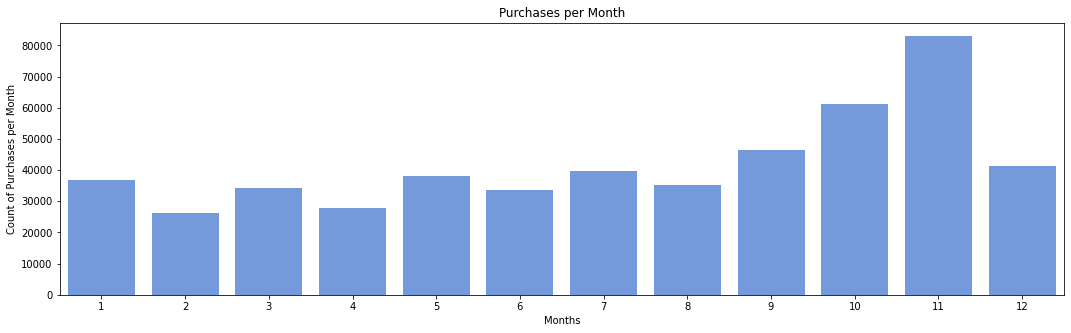

In [585]:
# find out the sales per month
sales_per_day = df_clean[['Month', 'InvoiceNo']].groupby('Month').count().reset_index()
g = sns.barplot(data=sales_per_day, x='Month', y='InvoiceNo', color='cornflowerblue')
g.set_title('Purchases per Month')
g.set_ylabel('Count of Purchases per Month')
g.set_xlabel('Months')
g;

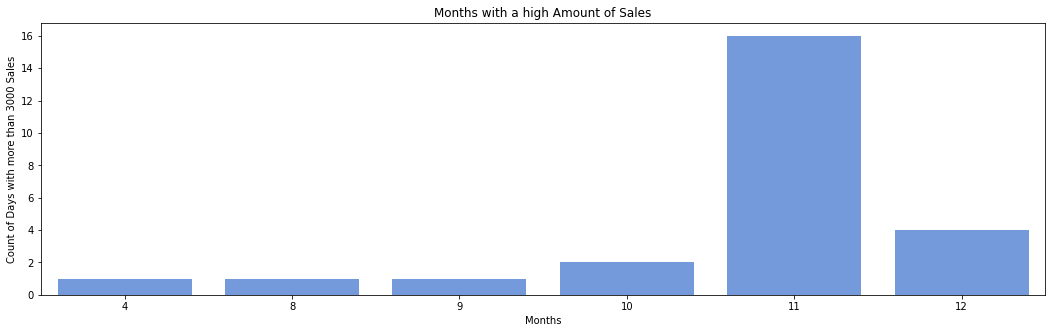

In [587]:
# group by months and dates to find out how many days have a high amount of sales (more than 2500 per day)
high_sale_dates = df_clean.groupby(['Month', 'Date']).agg({'InvoiceNo':'count', 'Revenue':'sum', 'PriceLevel':'mean'}).reset_index()
high_sale_dates = high_sale_dates[high_sale_dates['InvoiceNo']>3000]

# plot the months
g = sns.countplot(data=high_sale_dates, x='Month', color='cornflowerblue')
g.set_title('Months with a high Amount of Sales')
g.set_ylabel('Count of Days with more than 3000 Sales')
g.set_xlabel('Months')
g;

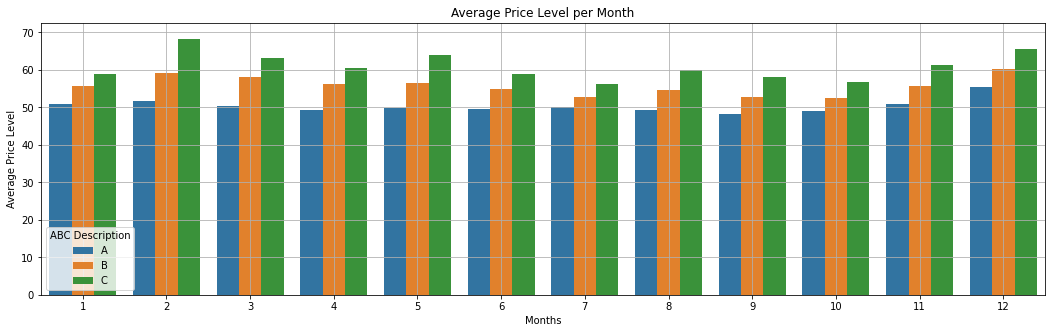

In [596]:
# find out the pricing during the year
g = sns.barplot(data=df_clean, x='Month',y='PriceLevel', hue='ABC Description', errwidth=0)
plt.grid()
g.set_title('Average Price Level per Month')
g.set_ylabel('Average Price Level')
g.set_xlabel('Months')
g;

### Result

* In April (4) the sales are so high because of the Easter holydays
* In August (8) and September (9) the sales are so high because the summer sale
* In October (10), November (11), and December (12) the Christmas sale drives the sales up

# Part 6 Summary, Conclusion and Suggestion

## What can we observe by Visualizations and Measures?

* There are many outliers in this dataset
* Almost every numerical data is right skewed (the mean is way higher than the median / 50% quantile)
* Most of the days had between 1000 and 2000 purchases
* End of October and in November, the amount of sales raises because of the Christmas sales
* From February, the prices decrease and in October, the prices start to increase


## How can we increase Profit?

* We should find out if we can offer the outlier products regularly (like the wicker picnic basket, storage jar, or the paper craft)
* Don't decrease the price below 42% of the maximum price
* Start newsletter and special offers for platinum and gold customers
* 20% of the customer make 80% of the revenue. We should ask them what we can do for them


## How can we save Storage Space?

* Sort out the C products, they use more than 50% of the storage space but only generate 6% of the revenue


## Based on past Sales, what are our Expectations for the Future?

* By sort out products with extreme low sales, we can save:
    * Storage costs
    * Personnel costs
    * Shipping costs


## Other Suggestions?

* Categorizing the products or a systematical description that makes categorizing easier for a data analyst